<a href="https://colab.research.google.com/github/whtan88/RandomDataAnalyst_DataAnalysis/blob/main/Uncover_Stock_Trading_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime,timedelta

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Defining Data time period
current_date = datetime.now().date()
start_date = current_date - timedelta(days=720)

# Download data
ticker = '^SPX'
df = yf.download(ticker, start=start_date, end=current_date, interval='1h', auto_adjust=True).reset_index()
df

[*********************100%***********************]  1 of 1 completed


Price,Datetime,Close,High,Low,Open,Volume
Ticker,,^SPX,^SPX,^SPX,^SPX,^SPX
0,2023-11-03 13:30:00+00:00,4348.879883,4364.470215,4334.229980,4334.229980,0
1,2023-11-03 14:30:00+00:00,4350.439941,4353.870117,4343.589844,4349.069824,341241863
2,2023-11-03 15:30:00+00:00,4366.430176,4367.680176,4350.430176,4350.430176,262855186
3,2023-11-03 16:30:00+00:00,4361.390137,4369.540039,4359.350098,4366.350098,230637433
4,2023-11-03 17:30:00+00:00,4368.049805,4369.020020,4360.370117,4361.379883,224379121
...,...,...,...,...,...,...
3426,2025-10-22 15:30:00+00:00,6698.459961,6719.620117,6694.689941,6700.520020,373703847
3427,2025-10-22 16:30:00+00:00,6675.700195,6702.919922,6662.729980,6698.520020,364047573
3428,2025-10-22 17:30:00+00:00,6678.390137,6683.220215,6655.689941,6675.589844,348320157


In [3]:
# Formatting column headings
df.columns = ['_'.join(col).strip() for col in df.columns.values]

# Creating date column
df['Date'] = pd.to_datetime(df['Datetime_']).dt.date
df['Date'] = pd.to_datetime(df['Date'])

# Indexing trading hours
df['trading_hour'] = df.groupby('Date').cumcount()
df['trading_hour'] = df['trading_hour'] + 1

# Rename columns
df = df.rename(columns={'Datetime_' : 'Datetime', 'Close_^SPX' : 'Close_hr', 'High_^SPX' : 'High_hr', 'Low_^SPX' : 'Low_hr', 'Open_^SPX' : 'Open_hr'})

df

,Datetime,Close_hr,High_hr,Low_hr,Open_hr,Volume_^SPX,Date,trading_hour
0,2023-11-03 13:30:00+00:00,4348.879883,4364.470215,4334.229980,4334.229980,0,2023-11-03,1
1,2023-11-03 14:30:00+00:00,4350.439941,4353.870117,4343.589844,4349.069824,341241863,2023-11-03,2
2,2023-11-03 15:30:00+00:00,4366.430176,4367.680176,4350.430176,4350.430176,262855186,2023-11-03,3
3,2023-11-03 16:30:00+00:00,4361.390137,4369.540039,4359.350098,4366.350098,230637433,2023-11-03,4
4,2023-11-03 17:30:00+00:00,4368.049805,4369.020020,4360.370117,4361.379883,224379121,2023-11-03,5
...,...,...,...,...,...,...,...,...
3426,2025-10-22 15:30:00+00:00,6698.459961,6719.620117,6694.689941,6700.520020,373703847,2025-10-22,3
3427,2025-10-22 16:30:00+00:00,6675.700195,6702.919922,6662.729980,6698.520020,364047573,2025-10-22,4
3428,2025-10-22 17:30:00+00:00,6678.390137,6683.220215,6655.689941,6675.589844,348320157,2025-10-22,5
3429,2025-10-22 18:30:00+00:00,6696.479980,6697.709961,6673.620117,6678.370117,352271337,2025-10-22,6


In [4]:
# Creating % difference between open and close, and high and low as features
df['open_close_hr_diff'] = 100*(df['Open_hr'] - df['Close_hr'])/df['Open_hr']
df['high_low_hr_diff'] = 100*(df['High_hr'] - df['Low_hr'])/df['Open_hr']
df

,Datetime,Close_hr,High_hr,Low_hr,Open_hr,Volume_^SPX,Date,trading_hour,open_close_hr_diff,high_low_hr_diff
0,2023-11-03 13:30:00+00:00,4348.879883,4364.470215,4334.229980,4334.229980,0,2023-11-03,1,-0.338005,0.697707
1,2023-11-03 14:30:00+00:00,4350.439941,4353.870117,4343.589844,4349.069824,341241863,2023-11-03,2,-0.031504,0.236379
2,2023-11-03 15:30:00+00:00,4366.430176,4367.680176,4350.430176,4350.430176,262855186,2023-11-03,3,-0.367780,0.396513
3,2023-11-03 16:30:00+00:00,4361.390137,4369.540039,4359.350098,4366.350098,230637433,2023-11-03,4,0.113595,0.233374
4,2023-11-03 17:30:00+00:00,4368.049805,4369.020020,4360.370117,4361.379883,224379121,2023-11-03,5,-0.152931,0.198329
...,...,...,...,...,...,...,...,...,...,...
3426,2025-10-22 15:30:00+00:00,6698.459961,6719.620117,6694.689941,6700.520020,373703847,2025-10-22,3,0.030745,0.372063
3427,2025-10-22 16:30:00+00:00,6675.700195,6702.919922,6662.729980,6698.520020,364047573,2025-10-22,4,0.340670,0.599982
3428,2025-10-22 17:30:00+00:00,6678.390137,6683.220215,6655.689941,6675.589844,348320157,2025-10-22,5,-0.041948,0.412402
3429,2025-10-22 18:30:00+00:00,6696.479980,6697.709961,6673.620117,6678.370117,352271337,2025-10-22,6,-0.271172,0.360714


In [5]:
# Download daily data
df_day = yf.download(ticker, start=start_date, end=current_date, interval='1d', auto_adjust=True).reset_index()
df_day.columns = ['_'.join(col).strip() for col in df_day.columns.values]
df_day = df_day.rename(columns={'Date_':'Date', 'Close_^SPX':'Day_close', 'Open_^SPX':'Day_open'})

# Merging the dataframes
df = pd.merge(df, df_day[['Date','Day_open','Day_close']], how='left', on='Date')
df

[*********************100%***********************]  1 of 1 completed


,Datetime,Close_hr,High_hr,Low_hr,Open_hr,Volume_^SPX,Date,trading_hour,open_close_hr_diff,high_low_hr_diff,Day_open,Day_close
0,2023-11-03 13:30:00+00:00,4348.879883,4364.470215,4334.229980,4334.229980,0,2023-11-03,1,-0.338005,0.697707,4334.229980,4358.339844
1,2023-11-03 14:30:00+00:00,4350.439941,4353.870117,4343.589844,4349.069824,341241863,2023-11-03,2,-0.031504,0.236379,4334.229980,4358.339844
2,2023-11-03 15:30:00+00:00,4366.430176,4367.680176,4350.430176,4350.430176,262855186,2023-11-03,3,-0.367780,0.396513,4334.229980,4358.339844
3,2023-11-03 16:30:00+00:00,4361.390137,4369.540039,4359.350098,4366.350098,230637433,2023-11-03,4,0.113595,0.233374,4334.229980,4358.339844
4,2023-11-03 17:30:00+00:00,4368.049805,4369.020020,4360.370117,4361.379883,224379121,2023-11-03,5,-0.152931,0.198329,4334.229980,4358.339844
...,...,...,...,...,...,...,...,...,...,...,...,...
3426,2025-10-22 15:30:00+00:00,6698.459961,6719.620117,6694.689941,6700.520020,373703847,2025-10-22,3,0.030745,0.372063,6741.339844,6699.399902
3427,2025-10-22 16:30:00+00:00,6675.700195,6702.919922,6662.729980,6698.520020,364047573,2025-10-22,4,0.340670,0.599982,6741.339844,6699.399902
3428,2025-10-22 17:30:00+00:00,6678.390137,6683.220215,6655.689941,6675.589844,348320157,2025-10-22,5,-0.041948,0.412402,6741.339844,6699.399902
3429,2025-10-22 18:30:00+00:00,6696.479980,6697.709961,6673.620117,6678.370117,352271337,2025-10-22,6,-0.271172,0.360714,6741.339844,6699.399902


In [6]:
# Inspect data distribution for high_low_hr_diff
df.groupby('trading_hour')['high_low_hr_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
trading_hour,,,,,,,,
1,493.0,0.513131,0.460246,0.086936,0.291536,0.415163,0.629556,8.307372
2,493.0,0.366001,0.282580,0.092810,0.204192,0.291064,0.438490,3.276201
3,493.0,0.321109,0.240076,0.058155,0.181599,0.254291,0.374279,2.743653
4,488.0,0.327863,0.392524,0.071722,0.171307,0.246971,0.368372,6.993425
5,488.0,0.321501,0.264661,0.064764,0.168644,0.246199,0.399208,3.101484
6,488.0,0.309064,0.264459,0.062563,0.160170,0.227833,0.361040,2.583829
7,488.0,0.294417,0.226491,0.064531,0.159004,0.236054,0.336963,1.691385


/tmp/ipython-input-3286454182.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="trading_hour", y="high_low_hr_diff", data=df, palette=["g"])
/tmp/ipython-input-3286454182.py:4: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="trading_hour", y="high_low_hr_diff", data=df, palette=["g"])


<Axes: xlabel='trading_hour', ylabel='high_low_hr_diff'>

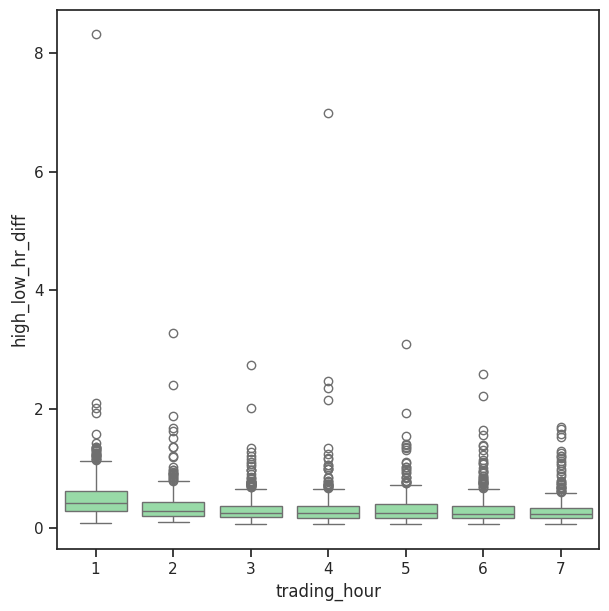

In [7]:
# Plotting boxplot of Volatility across trading hour
plt.figure(figsize=(7, 7))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="trading_hour", y="high_low_hr_diff", data=df, palette=["g"])

In [8]:
# Inspect data distribution for open_close_hr_diff
df.groupby('trading_hour')['open_close_hr_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
trading_hour,,,,,,,,
1,493.0,-0.011783,0.367556,-1.160859,-0.212206,-0.006251,0.162040,2.106714
2,493.0,0.011546,0.267191,-1.019192,-0.126961,-0.008350,0.117212,1.748709
3,493.0,-0.012437,0.256706,-1.159486,-0.119539,-0.016986,0.106249,2.265480
4,488.0,-0.007100,0.346531,-4.910705,-0.121612,-0.017775,0.096238,2.221569
5,488.0,-0.012668,0.280398,-2.798837,-0.115551,-0.017094,0.101596,1.032631
6,488.0,0.002768,0.230604,-0.686904,-0.107284,-0.012655,0.089145,1.241923
7,488.0,-0.008100,0.239205,-1.007336,-0.119888,-0.013190,0.090945,1.255368


/tmp/ipython-input-233597166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="trading_hour", y="open_close_hr_diff", data=df, palette=["g"])
/tmp/ipython-input-233597166.py:4: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="trading_hour", y="open_close_hr_diff", data=df, palette=["g"])


<Axes: xlabel='trading_hour', ylabel='open_close_hr_diff'>

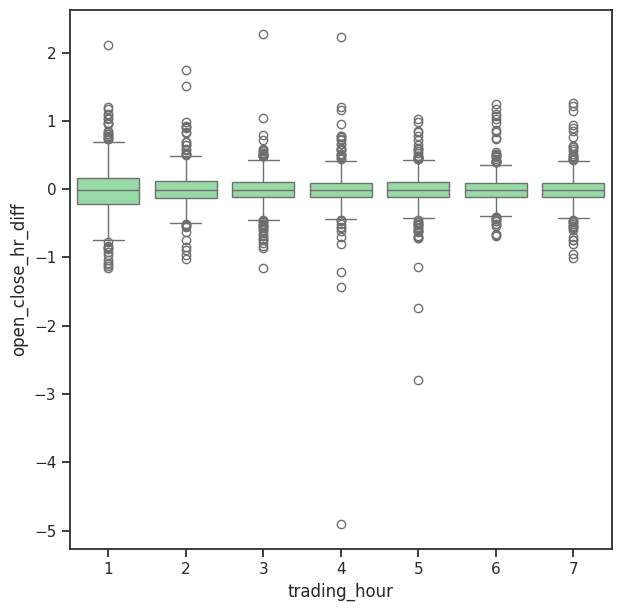

In [9]:
# Plotting boxplot of Open Close diff across trading hour
plt.figure(figsize=(7, 7))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="trading_hour", y="open_close_hr_diff", data=df, palette=["g"])

In [10]:
# Defining hypothesis
df['hr_close_vs_day_open'] = 100*(df['Day_open'] - df['Close_hr'])/df['Day_open']

df['test_hypothesis'] = np.where(((df['Close_hr'] > df['Day_open']) & (df['Day_close'] > df['Close_hr'])) | \
                       ((df['Close_hr'] < df['Day_open']) & (df['Day_close'] < df['Close_hr'])),1,0)

df

,Datetime,Close_hr,High_hr,Low_hr,Open_hr,Volume_^SPX,Date,trading_hour,open_close_hr_diff,high_low_hr_diff,Day_open,Day_close,hr_close_vs_day_open,test_hypothesis
0,2023-11-03 13:30:00+00:00,4348.879883,4364.470215,4334.229980,4334.229980,0,2023-11-03,1,-0.338005,0.697707,4334.229980,4358.339844,-0.338005,1
1,2023-11-03 14:30:00+00:00,4350.439941,4353.870117,4343.589844,4349.069824,341241863,2023-11-03,2,-0.031504,0.236379,4334.229980,4358.339844,-0.373999,1
2,2023-11-03 15:30:00+00:00,4366.430176,4367.680176,4350.430176,4350.430176,262855186,2023-11-03,3,-0.367780,0.396513,4334.229980,4358.339844,-0.742928,0
3,2023-11-03 16:30:00+00:00,4361.390137,4369.540039,4359.350098,4366.350098,230637433,2023-11-03,4,0.113595,0.233374,4334.229980,4358.339844,-0.626643,0
4,2023-11-03 17:30:00+00:00,4368.049805,4369.020020,4360.370117,4361.379883,224379121,2023-11-03,5,-0.152931,0.198329,4334.229980,4358.339844,-0.780296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,2025-10-22 15:30:00+00:00,6698.459961,6719.620117,6694.689941,6700.520020,373703847,2025-10-22,3,0.030745,0.372063,6741.339844,6699.399902,0.636074,0
3427,2025-10-22 16:30:00+00:00,6675.700195,6702.919922,6662.729980,6698.520020,364047573,2025-10-22,4,0.340670,0.599982,6741.339844,6699.399902,0.973688,0
3428,2025-10-22 17:30:00+00:00,6678.390137,6683.220215,6655.689941,6675.589844,348320157,2025-10-22,5,-0.041948,0.412402,6741.339844,6699.399902,0.933786,0
3429,2025-10-22 18:30:00+00:00,6696.479980,6697.709961,6673.620117,6678.370117,352271337,2025-10-22,6,-0.271172,0.360714,6741.339844,6699.399902,0.665444,0


<Axes: xlabel='trading_hour', ylabel='hr_close_vs_day_open'>

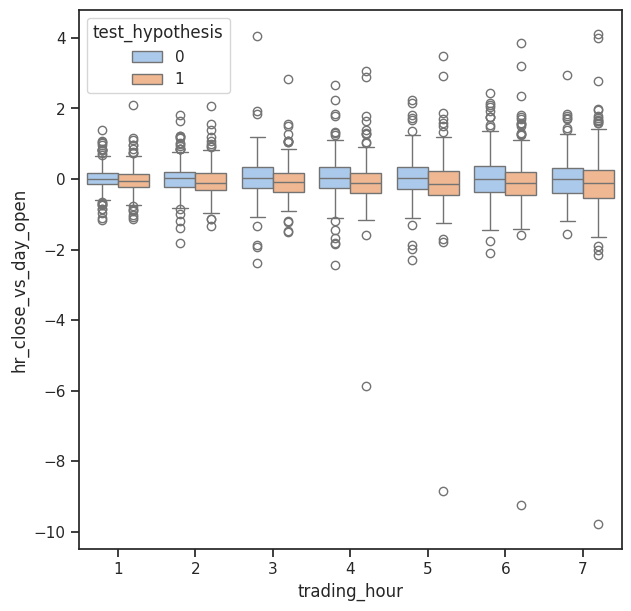

In [11]:
# Plotting boxplot to test hypothesis across trading hour
plt.figure(figsize=(7, 7))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="trading_hour", y="hr_close_vs_day_open", hue="test_hypothesis", data=df)

In [12]:
# Assessing hypothesis
pd.pivot_table(df, values=['test_hypothesis'], index=['trading_hour'],aggfunc={'test_hypothesis': "mean"})

,test_hypothesis
trading_hour,
1,0.547667
2,0.527383
3,0.529412
4,0.516393
5,0.456967
6,0.493852
7,0.600410


#**Portfolio Backtesting**

In [13]:
# Create function to backtest portfolio
def plot_portfolio(trading_hour,hypothesis,profit,loss):
  df_hypothesis = df[(df['trading_hour'] == trading_hour) & (df['Date'] >= '2025-01-01')][['Date','test_hypothesis']].copy()
  df_hypothesis['pnl'] = np.where(df_hypothesis['test_hypothesis'] == hypothesis, profit, loss)
  df_hypothesis['portfolio'] = 100 + df_hypothesis['pnl'].cumsum()
  sns.lineplot(x='Date', y='portfolio', data=df_hypothesis)
  plt.title("Backtest Portfolio Value")
  plt.xticks(rotation=45, ha='right')

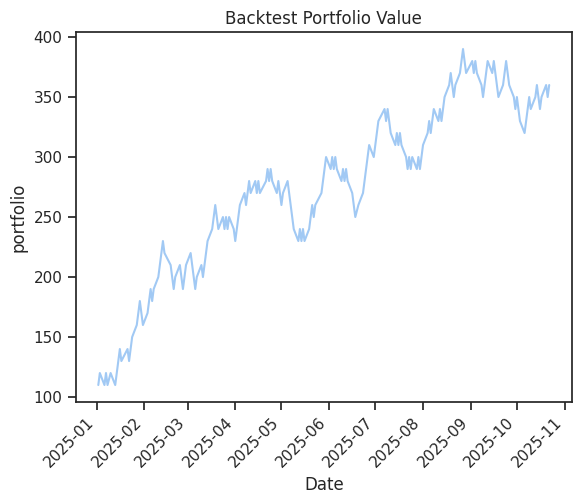

In [14]:
# Backtesting portfolio with trading hour 1, day close > hour close or day close < hour close with even pnl
plot_portfolio(1,1,10,-10)

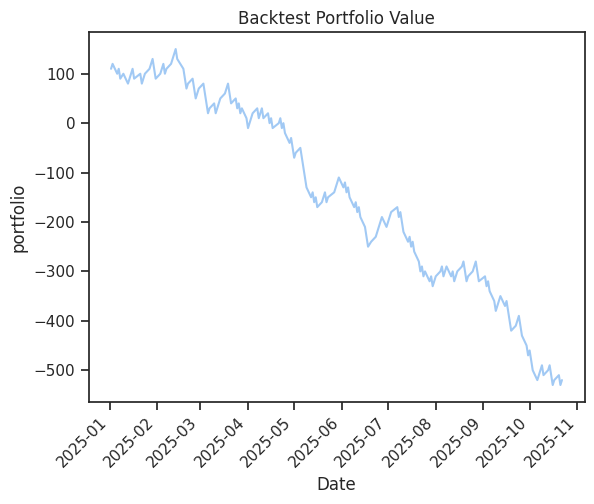

In [15]:
# Backtesting portfolio with trading hour 1, day close > hour close or day close < hour close with uneven pnl
plot_portfolio(1,1,10,-20)

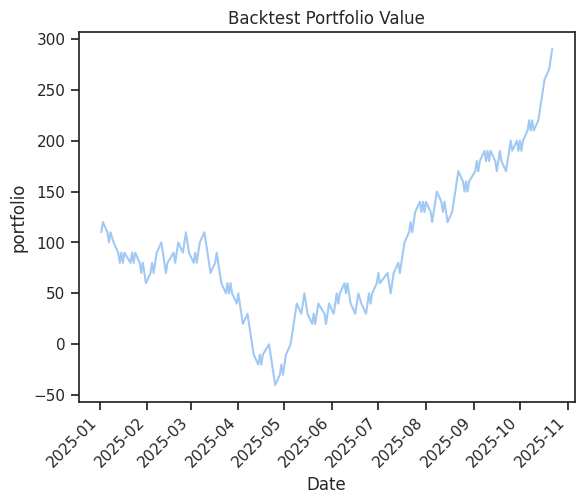

In [16]:
# Backtesting portfolio with trading hour 5, day close < hour close or day close > hour close with even pnl
plot_portfolio(5,0,10,-10)